# 나랑 닮은 연예인을 찾아보기

이번 프로젝트는 Computer Vision기반의 인공지능을
구현하는 것으로 다양한 사진으로 저와 비슷한 연예인을 찾는 것을 해보는 프로젝트입니다..

저는 이 프로젝트를 하면서 수 백장의 연예인 사진과 제 사진 2개를 넣었는데요. 그러면 저는 1~5위 사이에 제 사진이 있을 거라고 생각합니다.

그리고 matplolib를 이용하여 표를 작성해서 시각화 또한 하겠습니다.

# 사진 모으기

김상민 퍼실님께서 제공해주신 연예인 사진 과 제 사진 2장을 포함하여  사용했습니다.


필요한 모듈을 import하겠습니다


In [3]:

import os
import numpy as np
import matplotlib.pyplot as plt
import face_recognition

%matplotlib inline

이미지 데이터 준비하기 및 파일 리스트 부르기

In [4]:
dir_path = os.getenv('HOME')+'/aiffel/image'
file_list = os.listdir(dir_path)
print ("file_list: {}".format(file_list))

file_list: ['줄리엔강.png', '차범근.jpeg', '딕헌터.jpeg', '화사.jpg', '정수빈.jpg', '한기범.jpg', '차승원.jpg', '장원준.jpeg', '조정석.jpg', '김경진.png', '잭 니콜슨.jpeg', '이근대위.jpeg', '김영삼.jpeg', '봉준호.jpg', '로제.jpg', '강민경.jpg', '윤아.jpg', '곽도원.jpg', '이대호.jpeg', '지드래곤.jpeg', '지호.jpg', '택연.jpg', '제이홉.jpg', '잭 스페이더.jpeg', '김대중.jpg', '이희준.jpg', '강동원.jpg', '온앤오프와이엇.jpg', '박완규.png', '이동휘1.jpg', '레인보우재경.jpg', '류진.jpg', '한효주.jpg', '김윤석.jpeg', '최현석.jpg', '찬열.jpeg', '하현우.jpg', '효정.jpg', '김유정.jpg', '지디.jpg', '장원영.jpeg', 'obama.jpg', '크리스 에반스.jpg', 'clinton.jpeg', '유지태.jpg', '김연우.jpeg', '박보영.jpg', '이영하.jpg', '유해진1.jpg', '이세현.jpg', '트와이스미나.jpg', '리사.jpg', '이승환.jpg', '윤도현.png', '마크 러팔로.jpeg', '유재석1.jpg', '유리.jpg', '잇섭.png', '권현빈.jpg', '황정민.jpg', '벤 에플렉.jpeg', '차두리.jpeg', '조원희.jpg', '개코.jpeg', '제니.jpg', '유희열.jpeg', '트와이스나연.jpg', '트와이스쯔위.jpg', '크리스탈.jpg', '이용진.jpg', '홍구.jpg', '이대형.jpg', '이광수.jpg', '윤경신.jpg', '로다주.jpeg', 'biden.jpg', '주호민.jpeg', '케빈 스페이시.jpeg', '기성용.jpg', '톰 홀랜드.jpg', '다니엘 크레이그.jpeg', '이제훈.jpeg', '노홍철.jpeg', '김남주.jpeg

In [5]:
dir_path = os.getenv('HOME')+'/aiffel/image'
image_path = os.getenv('HOME')+'/aiffel/image/'

얼굴 영역을 자르는 함수 

In [7]:
def get_cropped_face(image_file):
    image = face_recognition.load_image_file(image_file)
    face_locations = face_recognition.face_locations(image)
    a, b, c, d = face_locations[0]
    cropped_face = image[a:c,d:b,:]
    
    return cropped_face

임베딩 벡터 구하는 과정


In [8]:
image_file = os.path.join(dir_path, '이세현.jpg')
cropped_face = get_cropped_face(image_file) 

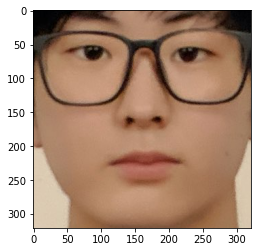

In [9]:
%matplotlib inline

plt.imshow(cropped_face)

얼굴이 인식이 안되는 사진들을 삭제했습니다

In [10]:
import os

def save_cropped_face(dir_path):
    file_list = os.listdir(dir_path)
    
    for file in file_list:
        try:
            img_path = os.path.join(dir_path, file)
            face = get_gropped_face(img_path)
            pillow_image = Image.fromarray(face)
            path_to_save = os.path.join(save_path, file)
            pillow_image.save(path_to_save)
            
        except:
            os.remove(img_path)
            print(file, "was removed")

    print('Cropped images are saved')

save_path = os.getenv('HOME')+'/aiffel/face_embedding/images_cropped'
save_cropped_face(dir_path)

줄리엔강.png was removed
차범근.jpeg was removed
딕헌터.jpeg was removed
화사.jpg was removed
정수빈.jpg was removed
한기범.jpg was removed
차승원.jpg was removed
장원준.jpeg was removed
조정석.jpg was removed
김경진.png was removed
잭 니콜슨.jpeg was removed
이근대위.jpeg was removed
김영삼.jpeg was removed
봉준호.jpg was removed
로제.jpg was removed
강민경.jpg was removed
윤아.jpg was removed
곽도원.jpg was removed
이대호.jpeg was removed
지드래곤.jpeg was removed
지호.jpg was removed
택연.jpg was removed
제이홉.jpg was removed
잭 스페이더.jpeg was removed
김대중.jpg was removed
이희준.jpg was removed
강동원.jpg was removed
온앤오프와이엇.jpg was removed
박완규.png was removed
이동휘1.jpg was removed
레인보우재경.jpg was removed
류진.jpg was removed
한효주.jpg was removed
김윤석.jpeg was removed
최현석.jpg was removed
찬열.jpeg was removed
하현우.jpg was removed
효정.jpg was removed
김유정.jpg was removed
지디.jpg was removed
장원영.jpeg was removed
obama.jpg was removed
크리스 에반스.jpg was removed
clinton.jpeg was removed
유지태.jpg was removed
김연우.jpeg was removed
박보영.jpg was removed
이영하.jpg was removed
유해진1.jpg 

In [11]:

import glob

files = glob.glob(os.path.join(save_path, '*.png'))
for file in files:
    if not os.path.isdir(file):
        src = os.path.splitext(file)
        os.rename(file, src[0] + '.jpg')

In [12]:
files = glob.glob(os.path.join(save_path, '*.jpeg'))
for file in files:
    if not os.path.isdir(file):
        src = os.path.splitext(file)
        os.rename(file, src[0] + '.jpg')

얼굴 영역만을 가지고 임베딩 벡터 구하는 함수 설정

In [13]:

def get_face_embedding(face):
    return face_recognition.face_encodings(face)



In [14]:
def get_face_embedding_dict(dir_path):
    file_list = os.listdir(dir_path)
    embedding_dict = {}
    cropped_dict = {}

    for file in file_list:
        img_path = os.path.join(dir_path, file)
        face = get_cropped_face(img_path)
        if face == []:
            continue
        embedding = get_face_embedding(face)
        if len(embedding) > 0:
           
            embedding_dict[os.path.splitext(file)[0]] = embedding[0]
            cropped_dict[os.path.splitext(file)[0]] = face

    return embedding_dict, cropped_dict

In [15]:
embedding_dict, cropped_dict = get_face_embedding_dict(dir_path)
embedding_dict['이세현']

KeyError: '이세현'

In [75]:
for item in embedding_dict.items():
    print(item[0])

줄리엔강
차범근
딕헌터
화사
정수빈
한기범
차승원
장원준
조정석
김경진
잭 니콜슨
이근대위
김영삼
봉준호
로제
강민경
윤아
곽도원
이대호
지드래곤
지호
택연
제이홉
잭 스페이더
김대중
이희준
강동원
온앤오프와이엇
박완규
이동휘1
레인보우재경
류진
김윤석
최현석
찬열
하현우
효정
김유정
지디
장원영
obama
크리스 에반스
clinton
유지태
김연우
박보영
이영하
유해진1
이세현
트와이스미나
리사
윤도현
마크 러팔로
유재석1
유리
잇섭
권현빈
황정민
벤 에플렉
차두리
조원희
개코
제니
유희열
트와이스나연
트와이스쯔위
크리스탈
이용진
홍구
이대형
이광수
윤경신
로다주
biden
주호민
케빈 스페이시
기성용
톰 홀랜드
다니엘 크레이그
이제훈
노홍철
김남주
정준하
이동국
유해진
채연
장성호
잭 갤리퍼내키스
조이
조달환
김래원
최민식
RM
정형돈
문재인
태양
드웨인 존슨
권태원
박서준
유노윤호
이민호
차명석
개리
이범수
제이콥 배털론
박해일
철면수심
조정치
박희순
도지한
장동건
백현
꽈두룹
이진호
디오
마동석
이경규
사쿠라
트와이스정연
류승룡
진
잇지예지
최무성
김광현
저스틴 존슨
류현진
이천수
켄 정
정민철
박용택
주진모(올드)
대도서관
박찬호
첸
김고은
이종석
김민재
지민(BTS)
나인뮤지스경리
잭 블랙
카이
강미나
송중기
크리스 햄스워스
존 파브르
트와이스다현
공효진
잇지유나
티모시 달튼
박찬욱
이정재
박건우
b1a4진영
이준혁
박재범
레오나르도 디카프리오
이승기
류승범
박나래
이효리
박항서
하하
황병국
제이크 질렌할
이연걸
하승진
박성호
유재석
하정우
김C
박진영
트와이스사나
미미
우기
브래들리 쿠퍼
박정민
이성민
이승철
태연
박신양
윤균상
trump
클린트 이스트우드
이안 굿펠로우
케이
이명박
이병헌
최양락
노무현
최준석
전소미
박명수
돈스파이크
조인성
한석규
방시혁
티파니
봉태규
김희철
피어스 브로스넌
이재용
정우성
류준열
유아
트와이스모모
지수
지코
조승우
로저 무어
공유
이동휘
윤종신
고창석
장도연
정국
민니


두 얼굴 사이의 거리 구하기

In [76]:

def get_distance(name1, name2):
    return np.linalg.norm(embedding_dict[name1]-embedding_dict[name2], ord=2)

In [78]:
def get_sort_key_func(name1):
    def get_distance_from_name1(name2):
        return get_distance(name1, name2)
    return get_distance_from_name1

순위 나열

In [79]:

def get_nearest_face_images(sorted_faces, top=5):
    fig = plt.figure(figsize=(15, 5))
    fig.add_subplot(2, top, 1)
    plt.imshow(cropped_dict[sorted_faces[0][0]])
    for i in range(1, top+1):
        fig.add_subplot(2, top, i+5)
        plt.imshow(cropped_dict[sorted_faces[i][0]])


가장 닮은 꼴 찾기

In [108]:
def get_nearest_face(name, top=5):
    sort_key_func = get_sort_key_func(name)
    sorted_faces = sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))

    for i in range(1,top+1):
        if i == 0:
            continue
        if sorted_faces[i]:
            print(f'순위 {i}  이름 : {sorted_faces[i][0]}, 거리: {sort_key_func(sorted_faces[i][0])}')
    return sorted_faces

# 평가문항1 & 2


In [109]:
sorted_faces = get_nearest_face('이세현')

순위 1  이름 : 류준열, 거리: 0.42000600052954645
순위 2  이름 : 권현빈, 거리: 0.4252021845732721
순위 3  이름 : 디오, 거리: 0.4285344840899001
순위 4  이름 : 윤균상, 거리: 0.4389623973221514
순위 5  이름 : 류현진, 거리: 0.43980584359862024


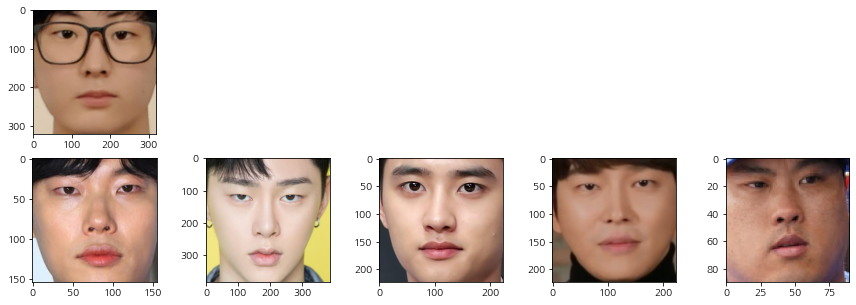

In [82]:
get_nearest_face_images(sorted_faces)

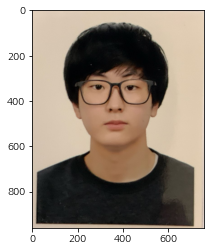

In [69]:
my_image = image_path + '이세현.jpg'
plt.imshow(face_recognition.load_image_file(my_image))

# 평가문항 3


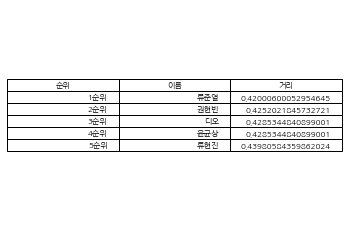

In [110]:
import matplotlib.pyplot as plt

fig, ax =plt.subplots(1,1)
data=[["1순위","류준열", 0.42000600052954645],
      ["2순위","권현빈", 0.4252021845732721],
      ["3순위","디오",0.4285344840899001],
      ["4순위","윤균상",0.4285344840899001],
      ["5순위","류현진",0.43980584359862024]]
column_labels=["순위", "이름", "거리"]
ax.axis('tight')
ax.axis('off')
ax.table(cellText=data,colLabels=column_labels,loc="center")

plt.show()

## 프로젝트 회고

* 임베딩이라는 개념을 그저 차원 축소로만 알고 있었는데 익숙해지게 되었습니다.

*  사실 고차원을 저차원으로 바꾸어서 이미지를 시각화하는 것을 글로만 보았을 때 너무나 생소한 개념이라서 처음에 애를 조금 먹긴 했습니다. 

* 물론 지금 나온 사진들이 저를 닮았으면 좋겠으나 실제로는 그렇지 않습니다. 그저 벡터끼리의 좌표로 사람을 정확히 인식하게 할 수는 없고 또 다른 무언가 필요할 것 같습니다..

* 프로젝트 도중 놀라웠던 것은 왜 제 사진과 저는 거리가 가깝지 않았던 것일까요? 제가 생각하기에는 얼굴은 같은 지라도 컴퓨터가 인식하느 벡터의 값들은 유사하지 않았기 때문이라고 생각합니다. 그렇기에 거리가 멀어져서 저 순위에 들어가지 못한 것이라고 생각합니다. (제 사진이 4냔 전에 찍은 사진과 오늘 찍은 사진을 비교한 것도 거리를 넓히는데 한 몫을 한 것 같습니다.)

* 마지막으로 matplotlib를 사용하여 가장 간단한 표를 만들었습니다. 그래프를 통해서 사진을 나열하려고 했지만 그건 이미 위해서 했기에 그 다음에 배운 표로 했습니다. 배운 것 말고 다른 것으로 시도는 해봤으나 아쉽게도 에러가 떴습니다.

* CV가 재미있습니다.